In [ ]:
Solar Power Genration Forecast

Ritik Bhardwaj

CS 458

Dr. Lei Yang

In [ ]:
PREPROCESSING THE DATA

In [79]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns;
sns.set(style="white")
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
from sklearn import metrics
import math
warnings.simplefilter("ignore")

In [80]:
df = pd.read_csv("solar (2).csv")
df.head(20)

,ZONEID,TIMESTAMP,VAR78,VAR79,VAR134,VAR157,VAR164,VAR165,VAR166,VAR167,VAR169,VAR175,VAR178,VAR228,POWER
0,1,20120401 01:00,0.001967,0.003609,94843.6250,60.221909,0.244601,1.039334,-2.503039,294.448486,2577830.0,1202532.0,2861797.0,0.000000,0.754103
1,1,20120401 02:00,0.005524,0.033575,94757.9375,54.678604,0.457138,2.482865,-2.993330,295.651367,5356093.0,2446757.0,5949378.0,0.000000,0.555000
2,1,20120401 03:00,0.030113,0.132009,94732.8125,61.294891,0.771429,3.339867,-1.982535,294.454590,7921788.0,3681336.0,8939176.0,0.001341,0.438397
3,1,20120401 04:00,0.057167,0.110645,94704.0625,67.775284,0.965866,3.106102,-1.446051,293.261475,9860520.0,4921504.0,11331679.0,0.002501,0.145449
4,1,20120401 05:00,0.051027,0.189560,94675.0000,70.172989,0.944669,2.601146,-1.904493,292.732910,11143097.0,6254380.0,13105558.0,0.003331,0.111987
5,1,20120401 06:00,0.036996,0.099045,94676.9375,72.374039,0.641353,1.333368,-1.728431,292.077148,11815767.0,7558415.0,14198503.0,0.003960,0.057244
6,1,20120401 07:00,0.080911,0.121323,94708.0625,81.798737,0.753142,1.457923,-1.034620,291.069336,12274591.0,8798617.0,14925342.0,0.004970,0.088718
7,1,20120401 08:00,0.036159,0.139069,94748.8125,87.854065,0.788338,2.374826,-1.089040,289.073486,12351290.0,10041167.0,15112951.0,0.006477,0.030064
8,1,20120401 09:00,0.036372,0.072609,94785.8125,88.793488,0.502275,1.985531,-0.963010,288.031250,12351290.0,11257316.0,15112951.0,0.006725,0.000128
9,1,20120401 10:00,0.014353,0.035797,94817.7500,90.450668,0.501918,1.999518,-0.930320,287.405762,12351290.0,12460132.0,15112951.0,0.006745,0.000000


In [81]:
df.iloc[0]['TIMESTAMP']

'20120401 01:00'

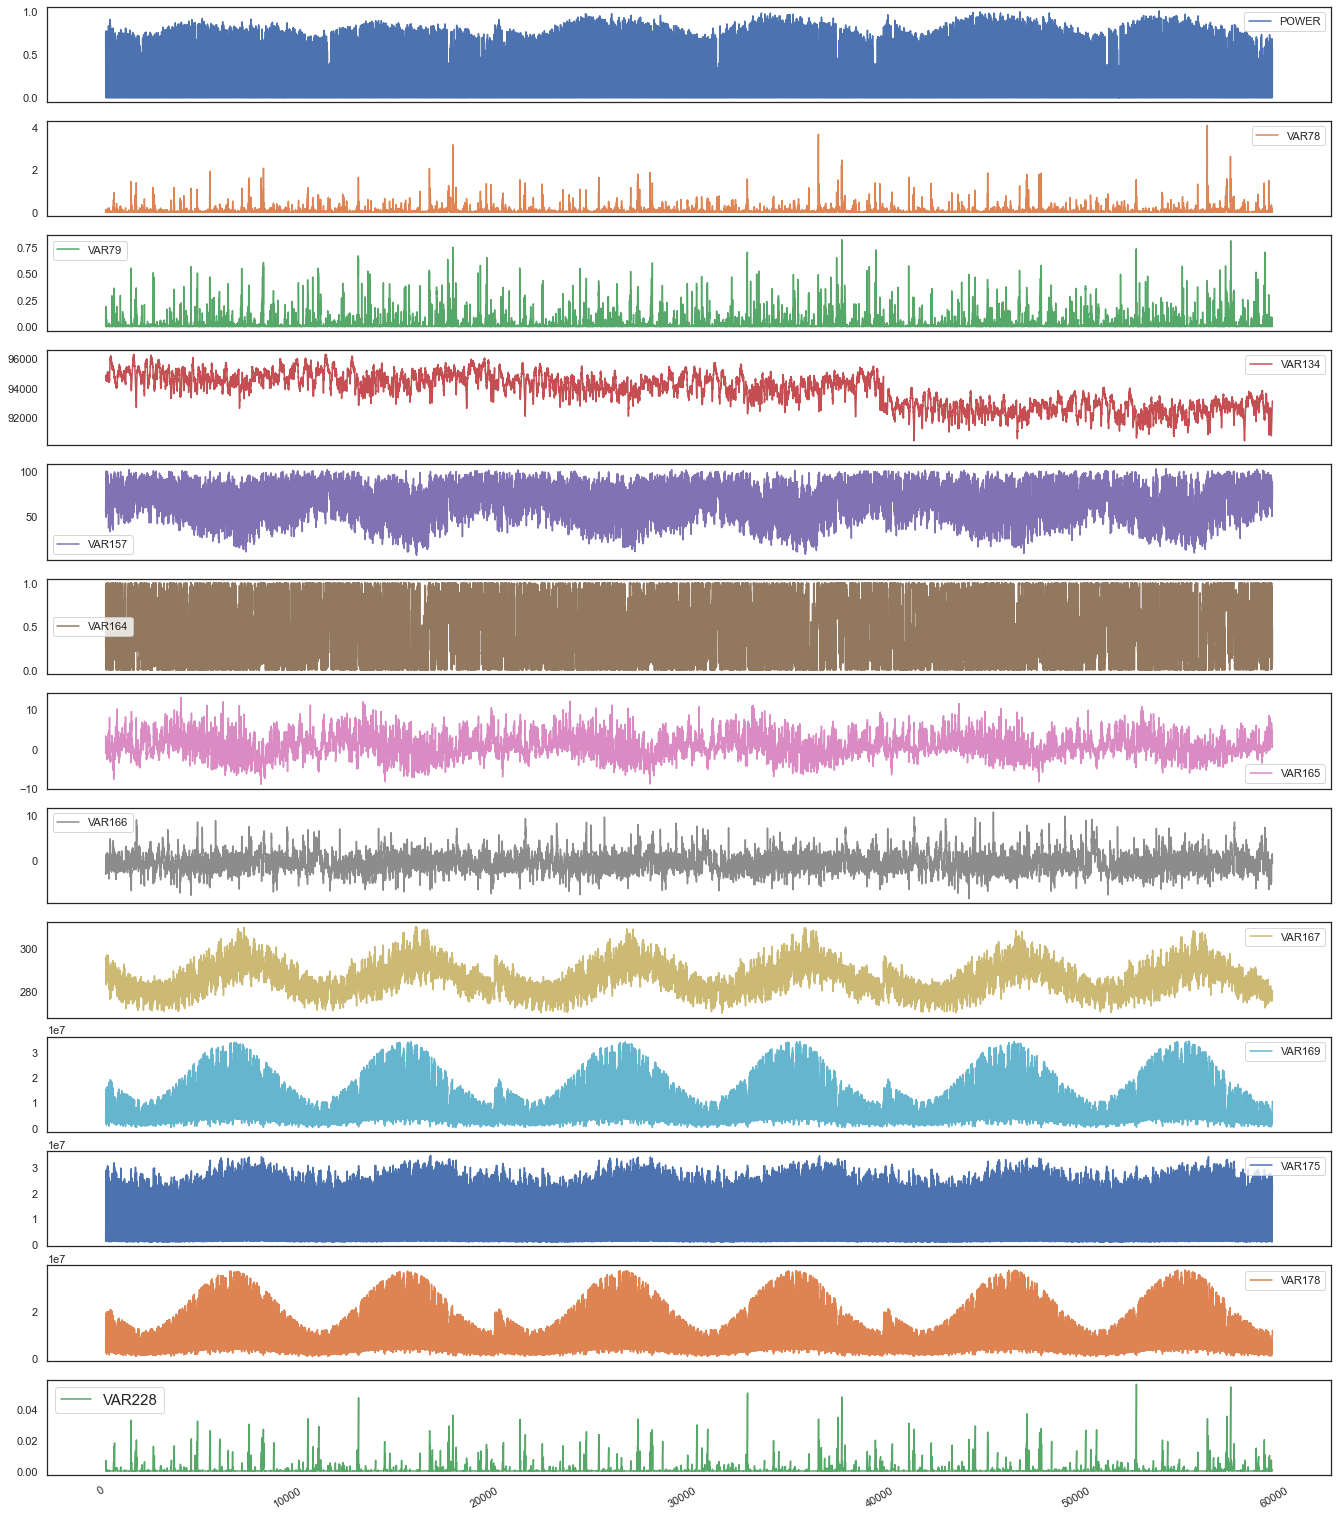

In [96]:
target = ["POWER"]

exog = ['VAR78', 'VAR79', 'VAR134', 'VAR157', 'VAR164', 'VAR165',
       'VAR166', 'VAR167', 'VAR169', 'VAR175', 'VAR178', 'VAR228']

ecol = target+exog

df[ecol].plot(subplots=True, figsize=(23, 30))
plt.legend(loc='best', fontsize=15)

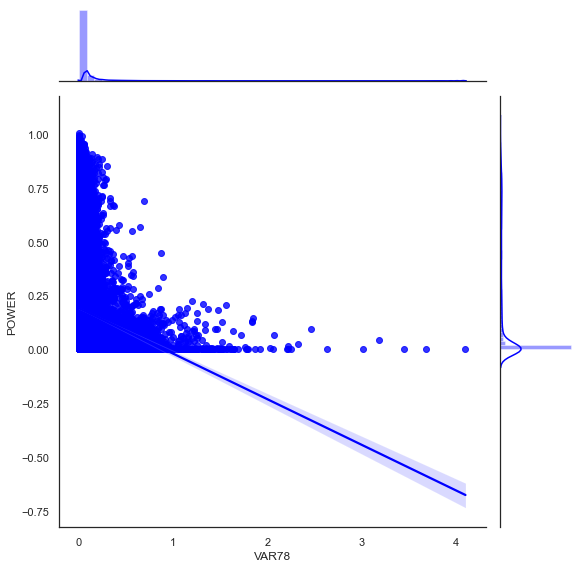

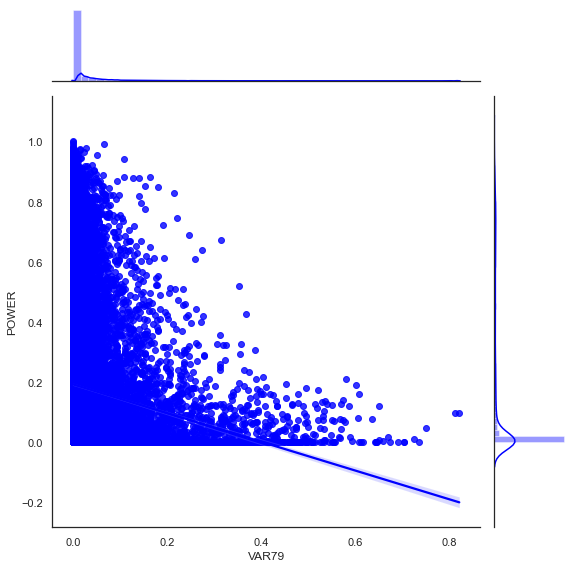

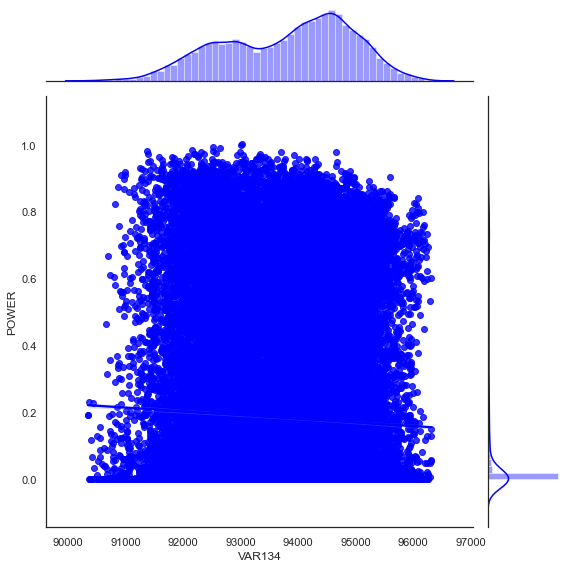

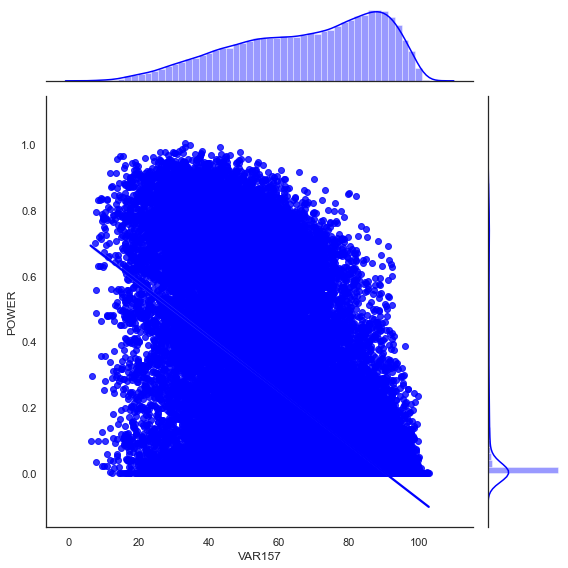

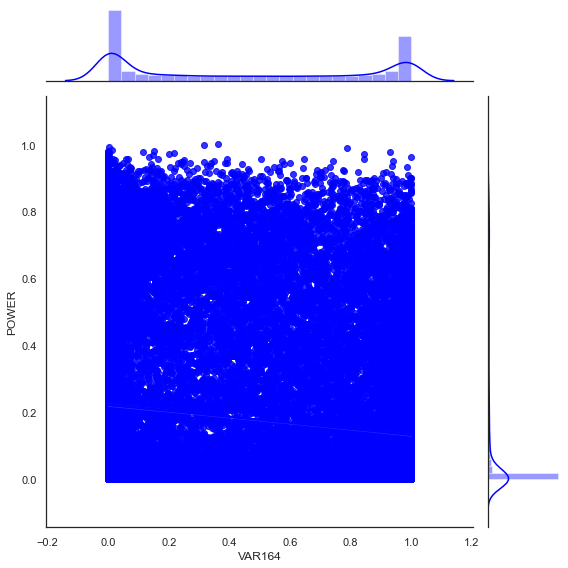

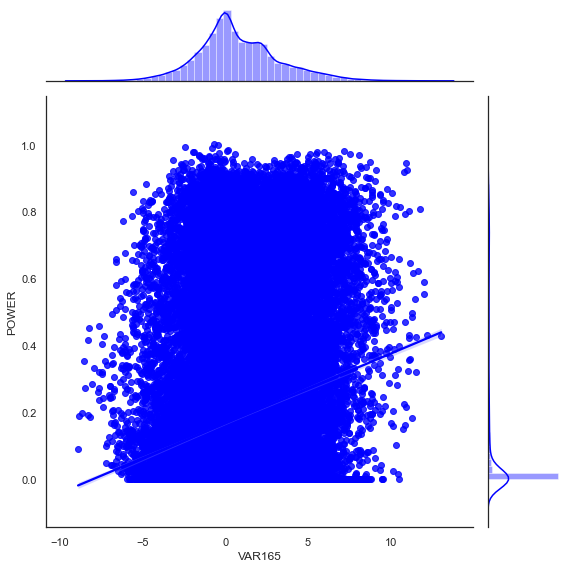

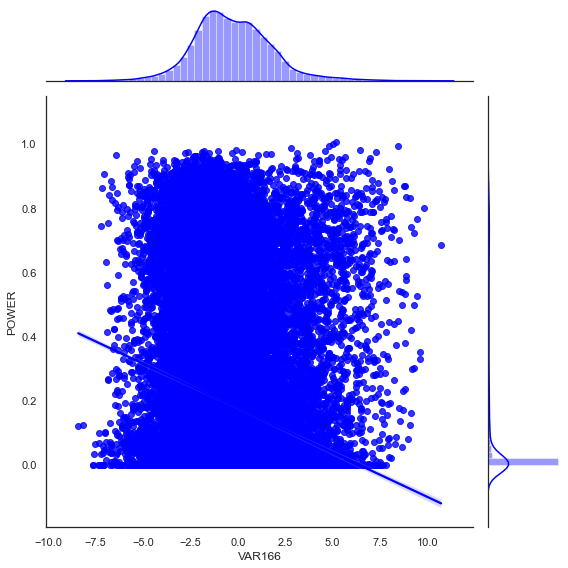

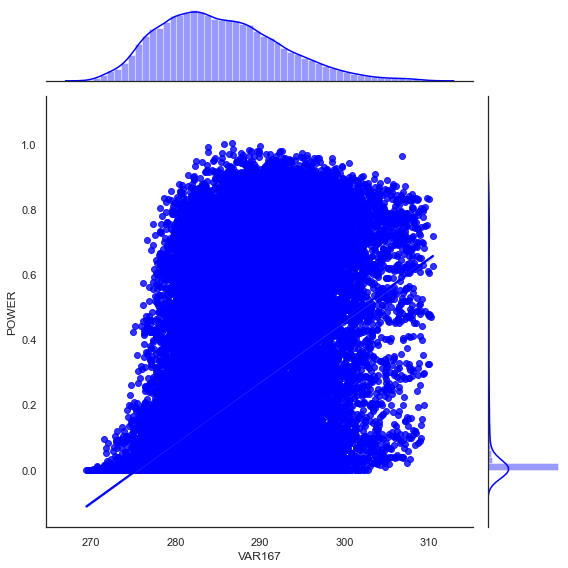

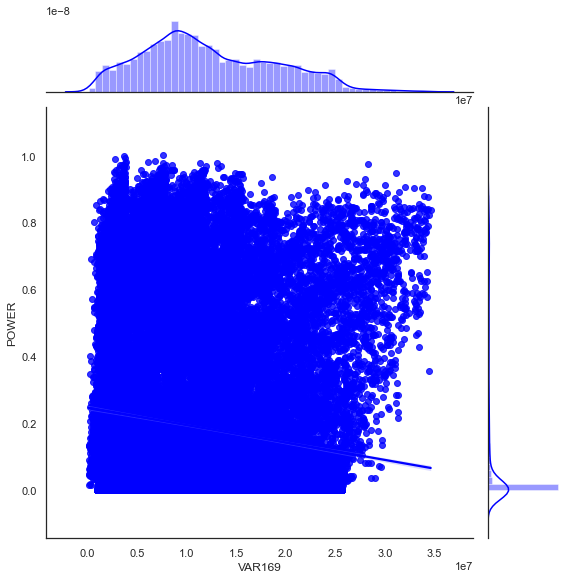

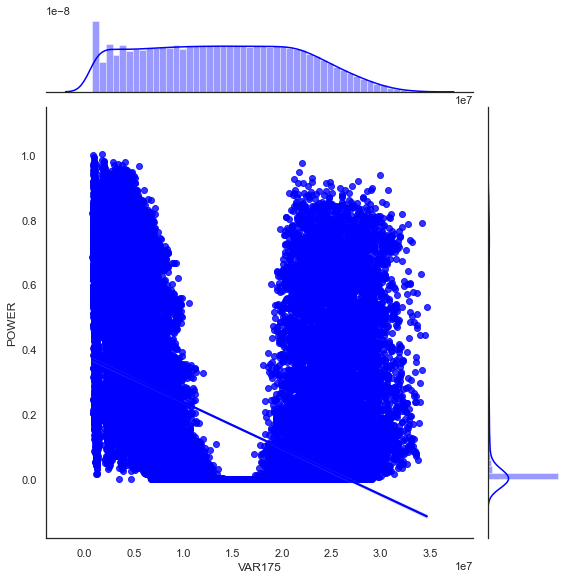

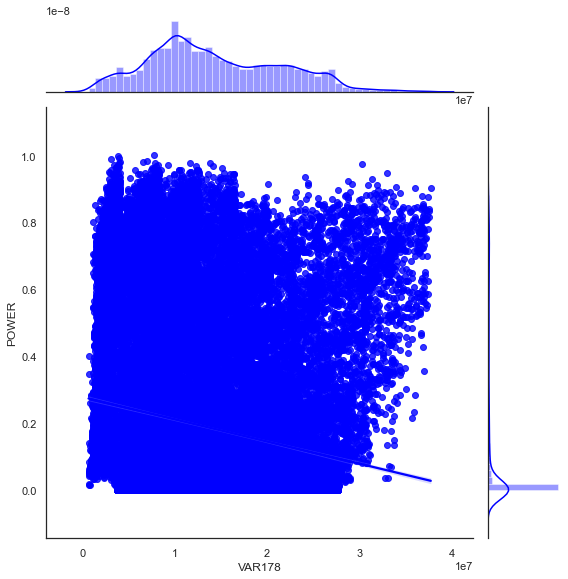

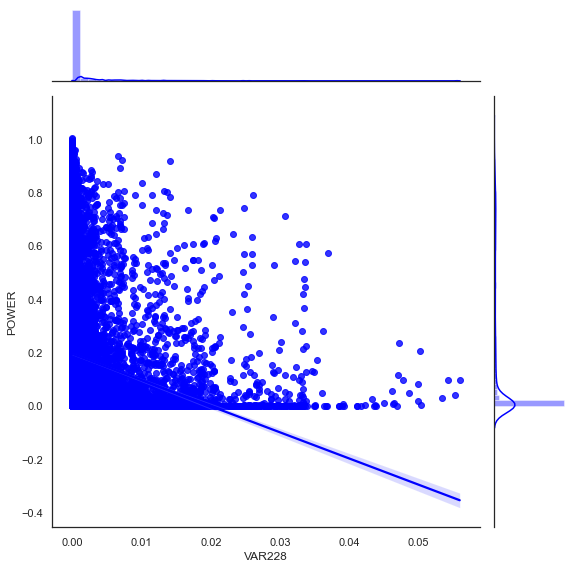

In [97]:
for col in exog:
  sns.jointplot(y=target[0],x=col,data=df, color='blue', size=8,kind="reg")

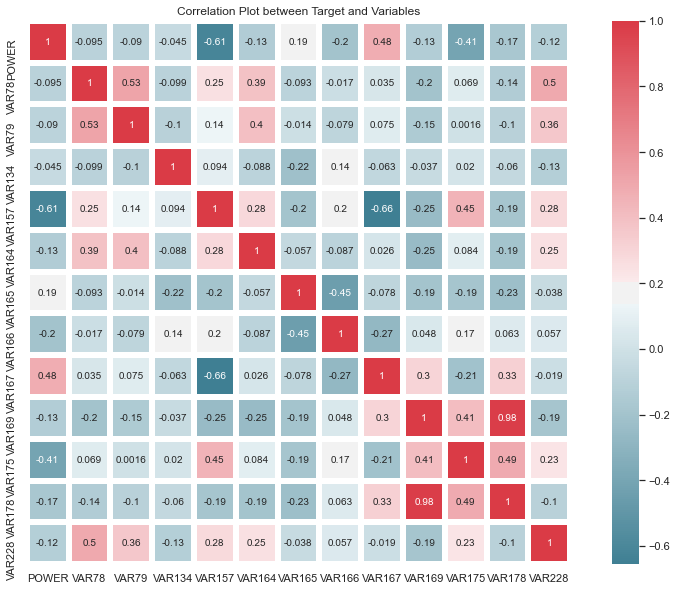

In [99]:
fig, ax =plt.subplots(figsize=(15, 10))
plt.title("Correlation Plot between Target and Variables")
sns.heatmap(df[ecol].corr(), mask=np.zeros_like(df[ecol].corr(), dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True,linewidths=5)
plt.show()

In [ ]:
SPLITTING SOLAR CSV INTO TRAINING AND TESTING CSV

In [82]:
df['date'] = pd.to_datetime(df['TIMESTAMP'], format="%Y%m%d %H:%M")

In [83]:
import datetime 
split_date = datetime.datetime.strptime('2013-07-01',"%Y-%m-%d")

In [84]:
def train_test(df, split_date):
    train = df[df['date']< split_date]
    test = df[df['date'] >= split_date]
    
    return(train, test)

#df_zone1_train, df_zone1_test = train_test(df_zone1, split_date)
df_train, df_test = train_test(df, split_date)

In [85]:
df_train.to_csv("solar_trainn.csv")
df_test.to_csv("solar_testt.csv")

df_zone1_train = pd.read_csv("solar_trainn.csv")
df.head(10)

,ZONEID,TIMESTAMP,VAR78,VAR79,VAR134,VAR157,VAR164,VAR165,VAR166,VAR167,VAR169,VAR175,VAR178,VAR228,POWER,date
0,1,20120401 01:00,0.001967,0.003609,94843.6250,60.221909,0.244601,1.039334,-2.503039,294.448486,2577830.0,1202532.0,2861797.0,0.000000,0.754103,2012-04-01 01:00:00
1,1,20120401 02:00,0.005524,0.033575,94757.9375,54.678604,0.457138,2.482865,-2.993330,295.651367,5356093.0,2446757.0,5949378.0,0.000000,0.555000,2012-04-01 02:00:00
2,1,20120401 03:00,0.030113,0.132009,94732.8125,61.294891,0.771429,3.339867,-1.982535,294.454590,7921788.0,3681336.0,8939176.0,0.001341,0.438397,2012-04-01 03:00:00
3,1,20120401 04:00,0.057167,0.110645,94704.0625,67.775284,0.965866,3.106102,-1.446051,293.261475,9860520.0,4921504.0,11331679.0,0.002501,0.145449,2012-04-01 04:00:00
4,1,20120401 05:00,0.051027,0.189560,94675.0000,70.172989,0.944669,2.601146,-1.904493,292.732910,11143097.0,6254380.0,13105558.0,0.003331,0.111987,2012-04-01 05:00:00
5,1,20120401 06:00,0.036996,0.099045,94676.9375,72.374039,0.641353,1.333368,-1.728431,292.077148,11815767.0,7558415.0,14198503.0,0.003960,0.057244,2012-04-01 06:00:00
6,1,20120401 07:00,0.080911,0.121323,94708.0625,81.798737,0.753142,1.457923,-1.034620,291.069336,12274591.0,8798617.0,14925342.0,0.004970,0.088718,2012-04-01 07:00:00
7,1,20120401 08:00,0.036159,0.139069,94748.8125,87.854065,0.788338,2.374826,-1.089040,289.073486,12351290.0,10041167.0,15112951.0,0.006477,0.030064,2012-04-01 08:00:00
8,1,20120401 09:00,0.036372,0.072609,94785.8125,88.793488,0.502275,1.985531,-0.963010,288.031250,12351290.0,11257316.0,15112951.0,0.006725,0.000128,2012-04-01 09:00:00
9,1,20120401 10:00,0.014353,0.035797,94817.7500,90.450668,0.501918,1.999518,-0.930320,287.405762,12351290.0,12460132.0,15112951.0,0.006745,0.000000,2012-04-01 10:00:00


In [86]:
df_test = pd.read_csv("solar_testt.csv")

In [87]:
df_zone1_train  = df_train[df_train['ZONEID']==1]

df_zone1_train.set_index(df_zone1_train['date'], inplace=True)

df_zone1_train.drop(columns=['ZONEID', 'TIMESTAMP','date'],inplace=True)

In [88]:
df_zone1_test  = df_test[df_test['ZONEID']==1]

df_zone1_test.set_index(df_zone1_test['date'], inplace=True)

df_zone1_test.drop(columns=['ZONEID', 'TIMESTAMP','date'],inplace=True)

In [89]:
df_zone1_train.describe()

,VAR78,VAR79,VAR134,VAR157,VAR164,VAR165,VAR166,VAR167,VAR169,VAR175,VAR178,VAR228,POWER
count,10943.000000,10943.000000,10943.000000,10943.000000,10943.000000,10943.000000,10943.000000,10943.000000,1.094300e+04,1.094300e+04,1.094300e+04,10943.000000,10943.000000
mean,0.038898,0.015657,94778.717765,69.064935,0.415942,0.731892,-0.183103,285.136194,1.189283e+07,1.381885e+07,1.384802e+07,0.001022,0.169065
std,0.113814,0.049717,572.544124,19.488321,0.398117,2.726438,1.922656,7.177586,6.451587e+06,7.718756e+06,6.877922e+06,0.003624,0.258989
min,0.000000,0.000000,92587.812500,10.228189,0.000000,-8.908603,-7.636124,270.266357,1.878204e+05,8.659728e+05,6.577261e+05,0.000000,0.000000
25%,0.000000,0.000000,94396.937500,54.658401,0.007355,-1.071431,-1.451473,279.773438,7.201339e+06,7.316626e+06,8.933927e+06,0.000000,0.000000
50%,0.002350,0.000082,94766.062500,72.079391,0.298248,0.521591,-0.377809,284.235840,1.058470e+07,1.371921e+07,1.248411e+07,0.000000,0.001795
75%,0.032383,0.005748,95181.125000,85.832870,0.855260,2.350634,0.979027,289.872436,1.652278e+07,1.994929e+07,1.880184e+07,0.000209,0.275897
max,2.068974,0.606646,96308.062500,101.790909,1.000007,13.056718,8.979910,310.062256,3.410930e+07,3.417538e+07,3.720136e+07,0.033727,0.916154


In [ ]:
BUILDING A 24 HOUR AHEAD SOLAR POWER GENERATION FORECAST

In [90]:
df_zone1_train['POWER_24'] = df_zone1_train['POWER'].shift(-24)

In [91]:
from sklearn.ensemble import RandomForestRegressor

In [92]:
random_regg = RandomForestRegressor(n_estimators=100, random_state=0)

In [93]:
df_zone1_train.columns

Index(['VAR78', 'VAR79', 'VAR134', 'VAR157', 'VAR164', 'VAR165', 'VAR166',
       'VAR167', 'VAR169', 'VAR175', 'VAR178', 'VAR228', 'POWER', 'POWER_24'],
      dtype='object')

In [95]:
def compute_zone(df_train, df_test):

  
    random_regg = RandomForestRegressor(n_estimators=100, random_state=0)
    model_cols =['VAR78', 'VAR79', 'VAR134', 'VAR157', 'VAR164', 'VAR165', 'VAR166',
       'VAR167', 'VAR169', 'VAR175', 'VAR178', 'VAR228']
    df_train['POWER_24'] = df_train['POWER'].shift(-24)
    df_train= df_train.iloc[:-24]
    random_regg.fit(df_train[model_cols], df_train['POWER_24'])
    
    preds = random_regg.predict(df_zone1_test[model_cols])
    actual = df_zone1_test['POWER'].shift(-24).iloc[:-24]
    
    return actual, preds[:-24]

In [78]:
zones = df_train['ZONEID'].unique()
for zone in zones:
    df_zone_train  = df_train[df_train['ZONEID']==zone]
    df_zone_test = df_test[df_test['ZONEID']==zone]
    actual, preds = compute_zone(df_zone_train, df_zone_test)
    print("For Zone: {} Mean absolute Error {}".format(zone, metrics.mean_absolute_error(actual,preds)))
    print("For Zone: {} Root Mean Squared Error {}".format(zone, math.sqrt(metrics.mean_squared_error(actual,preds))))

For Zone: 1 Mean absolute Error 0.06957245665841363
For Zone: 1 Root Mean Squared Error 0.1281622970486848
For Zone: 2 Mean absolute Error 0.09602999609408722
For Zone: 2 Root Mean Squared Error 0.1595706937648293
For Zone: 3 Mean absolute Error 0.10268228333718667
For Zone: 3 Root Mean Squared Error 0.16235987509786154
